# Airquality analysis v1.2

### Description
With this notebook you can analyze and plot the content of the airquality database.
Go through the notebook cell by cell and fill in the missing TODOs. 
If you never heard about Jupyter notebook, i can recommend [this video](https://www.youtube.com/watch?v=jZ952vChhuI) to get a basic glimpse of the concept. 
---

### Python import and data query
The first step is to import python packages used in the subsequent procedures. Pandas and Numpy are indispensible for Data Scientists and used for importing, manipulating and generating data. Furthermore, we use matplotlib for plotting and sqlite3 to import data from the sqlite database. 

In [ ]:
import sqlite3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter

%matplotlib inline

: 

### Data import from the database
Here we access the database and query all data available. With more advanced SQL queries we could also add some filters or sorting. However, since we don't have huge amounts of data, this is not necessary.

In [4]:
db_path = 'airquality.db' #path to airquality.db
con = sqlite3.connect(db_path)

# import all datapoints from each sensor
no2 = pd.read_sql_query("SELECT * from NO2", con)
co = pd.read_sql_query("SELECT * from CO", con)
o3 = pd.read_sql_query("SELECT * from O3", con)

# set datetime as index since it is unique in the dataset and can be used for resampling in a later step. 
no2.index = pd.to_datetime(no2['timestamp'])
co.index = pd.to_datetime(co['timestamp'])
o3.index = pd.to_datetime(o3['timestamp'])

# delete useless columns of the dataframe
no2.drop(['id', 'timestamp'], axis = 1, inplace = True)
co.drop(['id', 'timestamp'], axis = 1, inplace = True)
o3.drop(['id', 'timestamp'], axis = 1, inplace = True)

no2.head()

,id,timestamp,value,unit,temperature,humidity
0,1,2022-04-21 10:20:38.333760,0.008,ppm,18.722000,26.190000
1,2,2022-04-21 10:21:21.865158,0.007,ppm,18.453333,27.433333
2,3,2022-04-21 10:22:03.940100,0.007,ppm,17.168000,28.387333
3,4,2022-04-21 10:22:47.489067,0.007,ppm,16.590000,30.186667
4,5,2022-04-21 10:23:29.985511,0.007,ppm,17.376667,29.500000


In [3]:


no2.head()

---
## Basic information and stats about the data
As of now we have the data imported from the database and can work with it in the notebook. 
With df.head() you can easily investigate the first column of any dataframe visually. We will now investigate the data a bit more in detail and will:

- Reduce it to the timeframe of interest
- Calculate the arithmetic average
- Calculate the variance

After you have calculated the values, compare them with your fellow students and draw a conclusion (or not) if your sensor position affected the measurements. 

In [4]:
# The database also holds old data which we don't want to have in our calculations. 

print(f'The earliest datetime in the database is: {no2.index.min()}')
print(f'The latest datetime in the database is: {no2.index.max()}')

# TODO: Choose the timeframe of interest with the loc operator. Perform it for the no2, o3 and co dataframe.
#       Example: no2_sel = no2.loc['YYYY-MM-DD H:M:S':'YYYY-MM-DD H:M:S']

The earliest datetime in the database is: 2022-04-21 10:20:38.333760
The latest datetime in the database is: 2022-04-21 16:28:11.203006


In [5]:
# You can use df['column_name'].mean() to calculate the average of a dataframe column.  

# TODO: Apply .mean() to the 'value' column of the dataframes (e.g. no2['value']). 
#       You can also try out other functions such as: .sum(), .std() etc...

---
## Apply conversion factors
As described in the script, we need to apply conversion factors to convert the ppm value to µg/m^3. This is important, since the unit of the official limits is µg/m^3. 

In [6]:
# Convert the value from ppm to µg/m^3 and store it in a new column. 

# TODO: Look for the conversion factors in your course script and apply them to all values in the value 
#       column of the dataframe. Store the converted values in a new column. Investigate the converted
#       table with df.head()
# Hint: With df[NewColumn] = df[OldColumn] * value you can easily convert the values; 1 ppm = 1000 ppb 


---
## Plot the data

Now it is time to plot the values of each sensor and investigate the timeseries. Below you can find an example plot of the no2 values, the measured temperature and humidity. Find a good way to investigate the data, play around with scales, colors and plottypes.<br>
You can find example plots and descriptions [here](https://matplotlib.org/stable/plot_types/index.html). 

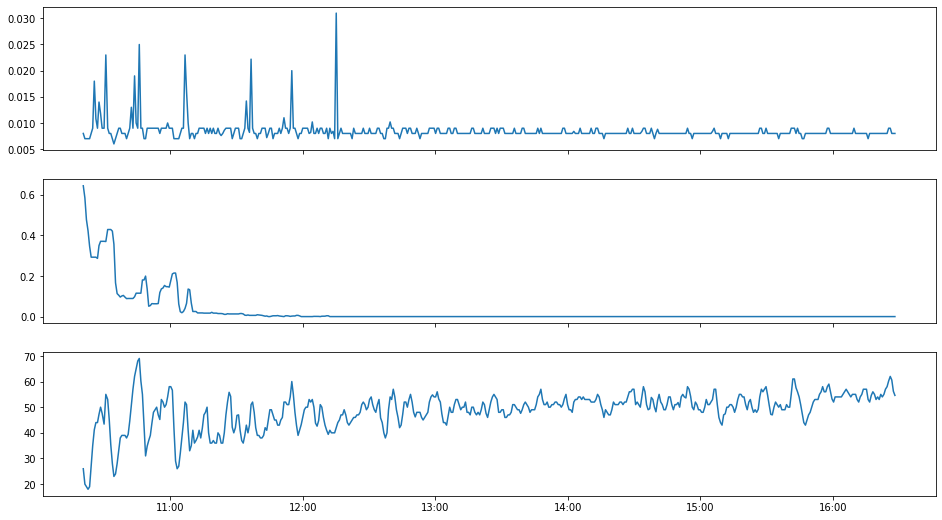

In [7]:
#value plot
fig, ax = plt.subplots(3, 1, figsize = (16,9), sharex = True)

ax[0].plot(no2["value"])
ax[1].plot(co["value"])
ax[2].plot(o3["value"])

hh_mm = DateFormatter('%H:%M')
ax[2].xaxis.set_major_formatter(hh_mm)

## Plot temperature and humidity in same timeframe

Using the example above, plot the temperature and Humidity in the same timeframe. 

In [8]:
# TODO: Plot temperature and humidity in the same timeframe
# Hint: Use the example above; The temperature and humidity in all dataframes are the same, 
#       therefore you only need to print them once. 



---
## Interpretation of the data
 What can you deduce from the graphs above?
 Do you think that the mean is a representative value considering the plot? 
 Are the sensors suited for the shown evaluation?

## Resampling of the data

With the very simple function df.resample('resample_time') you can calculate groups of data that fit a specific timeframe. E.g. df.resample('M').mean() returns a dataframe holding the monthly average of the data in df. We will now use this function to calculate 5min averaged and median values. 

In [9]:
# TODO: Use df.resample() to calculate a new dataframe holding the 5min average and median values. 
#       Plot the resampled values. 

